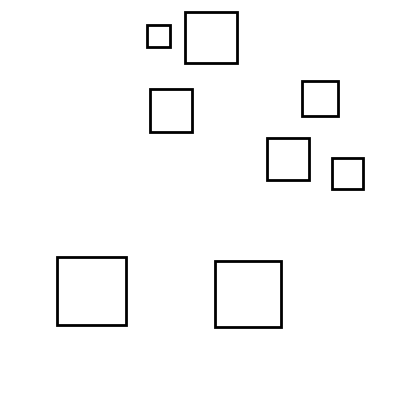

In [100]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random


def create_random_non_touching_squares(
    N, min_size=0.05, max_size=0.2, border_thickness=0.02
):
    # Create a new figure
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    # List to store the positions and sizes of squares
    squares = []

    # Generate squares
    for _ in range(N):
        while True:
            # Generate random size between min_size and max_size
            size = random.uniform(min_size, max_size)
            # Generate random position ensuring the square stays within the plot
            x, y = random.uniform(0, 1 - size), random.uniform(0, 1 - size)
            current_square = (x, y, size)

            # Check if the new square overlaps with any existing square's borders
            overlap = False
            for px, py, psize in squares:
                if not (
                    x + size + border_thickness < px
                    or x > px + psize + border_thickness
                    or y + size + border_thickness < py
                    or y > py + psize + border_thickness
                ):
                    overlap = True
                    break
            if not overlap:
                squares.append(current_square)
                break

        # Create and add the square patch
        square = patches.Rectangle(
            (x, y),
            size,
            size,
            linewidth=2,
            edgecolor="black",
            facecolor="none",
        )
        ax.add_patch(square)

    # Set the limits of the plot
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Remove the axis border
    ax.axis("off")

    # Display the plot
    plt.show()


# Example usage with N squares
create_random_non_touching_squares(8)

In [103]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import os
import json


def create_random_non_touching_squares(
    N,
    repetitions=10,
    min_size=0.05,
    max_size=0.2,
    border_thickness=0.02,
    save_path="images",
):
    # Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)

    # Data dictionary to store image details
    data = []

    # Generate and save N images for each number of squares
    for num_squares in range(1, N + 1):
        for rep in range(repetitions):
            fig, ax = plt.subplots(1, 1, figsize=(5, 5))
            squares = []

            for _ in range(num_squares):
                while True:
                    size = random.uniform(min_size, max_size)
                    x, y = random.uniform(0, 1 - size), random.uniform(0, 1 - size)
                    current_square = (x, y, size)

                    overlap = False
                    for px, py, psize in squares:
                        if not (
                            x + size + border_thickness < px
                            or x > px + psize + border_thickness
                            or y + size + border_thickness < py
                            or y > py + psize + border_thickness
                        ):
                            overlap = True
                            break
                    if not overlap:
                        squares.append(current_square)
                        break

                square = patches.Rectangle(
                    (x, y), size, size, linewidth=2, edgecolor="black", facecolor="none"
                )
                ax.add_patch(square)

            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.axis("off")

            # Save the figure
            image_name = f"square_{num_squares}_{rep+1}.png"
            plt.savefig(os.path.join(save_path, image_name))
            plt.close(fig)

            # Store details in the data dictionary
            data.append(
                {
                    "image_name": image_name,
                    "number_of_squares": num_squares,
                    "squares": [
                        {"x": x, "y": y, "size": size} for x, y, size in squares
                    ],
                }
            )

    # Save data to a JSON file
    with open(os.path.join(save_path, "data.json"), "w") as f:
        json.dump(data, f, indent=4)


# Example usage: generate 100 images with 10 images for each 1 to 10 squares
create_random_non_touching_squares(10)

# Nested Squares



In [105]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import os
import json


def create_random_non_touching_squares_with_nesting(
    N,
    repetitions=2,  # Adjusted to 2 images per number of squares
    min_size=0.05,
    max_size=0.2,
    border_thickness=0.02,
    save_path="nested_images",
):
    # Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)

    # Data dictionary to store image details
    data = []

    # Generate and save N images for each number of squares
    for num_squares in range(2, N + 1):  # Adjusted range to 2 to N
        for rep in range(repetitions):
            fig, ax = plt.subplots(1, 1, figsize=(5, 5))
            squares = []

            # Create the first square (largest one)
            size = random.uniform(min_size, max_size)
            x, y = random.uniform(0, 1 - size), random.uniform(0, 1 - size)
            squares.append((x, y, size))
            square = patches.Rectangle(
                (x, y), size, size, linewidth=2, edgecolor="black", facecolor="none"
            )
            ax.add_patch(square)

            # Create nested and non-overlapping squares
            for _ in range(1, num_squares):
                nested = random.choice(
                    [True, False]
                )  # Randomly decide if nested or not
                if nested and squares:  # Ensure there is a square to nest within
                    px, py, psize = squares[-1]  # Nest within the last square
                    max_nested_size = (
                        psize * 0.5
                    )  # Max size is half of the parent square
                    size = random.uniform(min_size, min(max_nested_size, max_size))
                    x = random.uniform(px, px + psize - size)
                    y = random.uniform(py, py + psize - size)
                else:
                    while True:
                        size = random.uniform(min_size, max_size)
                        x, y = random.uniform(0, 1 - size), random.uniform(0, 1 - size)
                        overlap = False
                        for px, py, psize in squares:
                            if not (
                                x + size + border_thickness < px
                                or x > px + psize + border_thickness
                                or y + size + border_thickness < py
                                or y > py + psize + border_thickness
                            ):
                                overlap = True
                                break
                        if not overlap:
                            break

                squares.append((x, y, size))
                square = patches.Rectangle(
                    (x, y), size, size, linewidth=2, edgecolor="black", facecolor="none"
                )
                ax.add_patch(square)

            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.axis("off")

            # Save the figure
            image_name = f"nested_square_{num_squares}_{rep+1}.png"
            plt.savefig(os.path.join(save_path, image_name))
            plt.close(fig)

            # Store details in the data dictionary
            data.append(
                {
                    "image_name": image_name,
                    "number_of_squares": num_squares,
                    "squares": [
                        {"x": x, "y": y, "size": size} for x, y, size in squares
                    ],
                }
            )

    # Save data to a JSON file
    with open(os.path.join(save_path, "data.json"), "w") as f:
        json.dump(data, f, indent=4)


# Example usage: generate images with 2 to 5 squares, 2 images each
create_random_non_touching_squares_with_nesting(5)

In [106]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import os
import json


def create_random_non_touching_squares_with_nesting(
    N,
    repetitions=2,  # Adjusted to 2 images per number of squares
    min_size=0.05,
    max_size=0.2,
    border_thickness=0.02,
    save_path="nested_images",
):
    # Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)

    # Data dictionary to store image details
    data = []

    # Generate and save N images for each number of squares
    for num_squares in range(2, N + 1):  # Adjusted range to 2 to N
        for rep in range(repetitions):
            fig, ax = plt.subplots(1, 1, figsize=(5, 5))
            squares = []

            # Create the first square (largest one)
            size = random.uniform(min_size, max_size)
            x, y = random.uniform(0, 1 - size), random.uniform(0, 1 - size)
            squares.append((x, y, size))
            square = patches.Rectangle(
                (x, y), size, size, linewidth=2, edgecolor="black", facecolor="none"
            )
            ax.add_patch(square)

            # Create nested and non-overlapping squares
            for _ in range(1, num_squares):
                nested = random.choice(
                    [True, False]
                )  # Randomly decide if nested or not
                if nested and squares:  # Ensure there is a square to nest within
                    px, py, psize = squares[-1]  # Nest within the last square
                    max_nested_size = (
                        psize * 0.5
                    )  # Max size is half of the parent square
                    size = random.uniform(min_size, min(max_nested_size, max_size))
                    x = random.uniform(
                        px + border_thickness, px + psize - size - border_thickness
                    )
                    y = random.uniform(
                        py + border_thickness, py + psize - size - border_thickness
                    )
                else:
                    while True:
                        size = random.uniform(min_size, max_size)
                        x, y = random.uniform(0, 1 - size), random.uniform(0, 1 - size)
                        overlap = False
                        for px, py, psize in squares:
                            if not (
                                x + size + border_thickness < px
                                or x > px + psize + border_thickness
                                or y + size + border_thickness < py
                                or y > py + psize + border_thickness
                            ):
                                overlap = True
                                break
                        if not overlap:
                            break

                squares.append((x, y, size))
                square = patches.Rectangle(
                    (x, y), size, size, linewidth=2, edgecolor="black", facecolor="none"
                )
                ax.add_patch(square)

            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.axis("off")

            # Save the figure
            image_name = f"nested_square_{num_squares}_{rep+1}.png"
            plt.savefig(os.path.join(save_path, image_name))
            plt.close(fig)

            # Store details in the data dictionary
            data.append(
                {
                    "image_name": image_name,
                    "number_of_squares": num_squares,
                    "squares": [
                        {"x": x, "y": y, "size": size} for x, y, size in squares
                    ],
                }
            )

    # Save data to a JSON file
    with open(os.path.join(save_path, "data.json"), "w") as f:
        json.dump(data, f, indent=4)


# Example usage: generate images with 2 to 5 squares, 2 images each
create_random_non_touching_squares_with_nesting(5)

In [116]:
def create_random_non_touching_squares_with_nesting(
    N,
    repetitions=2,  # Adjusted to 2 images per number of squares
    min_size=0.2,
    max_size=0.5,
    border_thickness=0.02,
    save_path="nested_images",
):
    # Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)

    # Data dictionary to store image details
    data = []

    # Generate and save N images for each number of squares
    for num_squares in range(2, N + 1):  # Adjusted range to 2 to N
        for rep in range(repetitions):
            fig, ax = plt.subplots(1, 1, figsize=(5, 5))
            squares = []

            # Create the first square (largest one)
            size = random.uniform(min_size, max_size)
            x, y = random.uniform(0, 1 - size), random.uniform(0, 1 - size)
            squares.append((x, y, size))
            square = patches.Rectangle(
                (x, y), size, size, linewidth=2, edgecolor="black", facecolor="none"
            )
            ax.add_patch(square)

            # Create nested squares
            for _ in range(1, num_squares):
                px, py, psize = squares[-1]  # Nest within the last square
                max_nested_size = psize * 0.5  # Max size is half of the parent square
                size = random.uniform(min_size, min(max_nested_size, max_size))
                x = random.uniform(
                    px + border_thickness, px + psize - size - border_thickness
                )
                y = random.uniform(
                    py + border_thickness, py + psize - size - border_thickness
                )

                squares.append((x, y, size))
                square = patches.Rectangle(
                    (x, y), size, size, linewidth=2, edgecolor="black", facecolor="none"
                )
                ax.add_patch(square)

            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.axis("off")

            # Save the figure
            image_name = f"nested_square_{num_squares}_{rep+1}.png"
            plt.savefig(os.path.join(save_path, image_name))
            plt.close(fig)

            # Store details in the data dictionary
            data.append(
                {
                    "image_name": image_name,
                    "number_of_squares": num_squares,
                    "squares": [
                        {"x": x, "y": y, "size": size} for x, y, size in squares
                    ],
                }
            )

    # Save data to a JSON file
    with open(os.path.join(save_path, "data.json"), "w") as f:
        json.dump(data, f, indent=4)


# Example usage: generate images with 2 to 5 squares, 2 images each
create_random_non_touching_squares_with_nesting(5)

In [119]:
def create_random_non_touching_squares_with_nesting(
    N,
    repetitions=2,  # Adjusted to 2 images per number of squares
    min_size=0.2,
    max_size=1,
    border_thickness=0.02,
    save_path="nested_images",
):
    # Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)

    # Data dictionary to store image details
    data = []

    # Generate and save N images for each number of squares
    for num_squares in range(2, N + 1):  # Adjusted range to 2 to N
        for rep in range(repetitions):
            fig, ax = plt.subplots(1, 1, figsize=(5, 5))
            squares = []

            # Create the first square (largest one)
            size = random.uniform(min_size, max_size)
            x, y = random.uniform(0, 1 - size), random.uniform(0, 1 - size)
            squares.append((x, y, size))
            square = patches.Rectangle(
                (x, y), size, size, linewidth=2, edgecolor="black", facecolor="none"
            )
            ax.add_patch(square)

            # Create nested squares
            for _ in range(1, num_squares):
                px, py, psize = squares[-1]  # Nest within the last square
                max_nested_size = (
                    psize - 2 * border_thickness
                )  # Adjust size to include border
                size = random.uniform(min_size, min(max_nested_size, max_size))
                x = px + border_thickness
                y = py + border_thickness

                squares.append((x, y, size))
                square = patches.Rectangle(
                    (x, y), size, size, linewidth=2, edgecolor="black", facecolor="none"
                )
                ax.add_patch(square)

            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.axis("off")

            # Save the figure
            image_name = f"nested_square_{num_squares}_{rep+1}.png"
            plt.savefig(os.path.join(save_path, image_name))
            plt.close(fig)

            # Store details in the data dictionary
            data.append(
                {
                    "image_name": image_name,
                    "number_of_squares": num_squares,
                    "squares": [
                        {"x": x, "y": y, "size": size} for x, y, size in squares
                    ],
                }
            )

    # Save data to a JSON file
    with open(os.path.join(save_path, "data.json"), "w") as f:
        json.dump(data, f, indent=4)


# Example usage: generate images with 2 to 5 squares, 2 images each
create_random_non_touching_squares_with_nesting(5)

In [123]:
def create_random_non_touching_squares_with_nesting(
    N,
    repetitions=2,  # Adjusted to 2 images per number of squares
    min_size=0.01,
    max_size=1,
    border_thickness=0.02,
    save_path="nested_images",
):
    # Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)

    # Data dictionary to store image details
    data = []

    # Generate and save N images for each number of squares
    for num_squares in range(2, N + 1):  # Adjusted range to 2 to N
        for rep in range(repetitions):
            fig, ax = plt.subplots(1, 1, figsize=(5, 5))
            squares = []

            # Create the first square (largest one)
            size = random.uniform(min_size, max_size)
            x, y = 0.5 - size / 2, 0.5 - size / 2  # Center the largest square
            squares.append((x, y, size))
            square = patches.Rectangle(
                (x, y), size, size, linewidth=2, edgecolor="black", facecolor="none"
            )
            ax.add_patch(square)

            # Create nested squares
            for _ in range(1, num_squares):
                px, py, psize = squares[-1]  # Nest within the last square
                max_nested_size = (
                    psize - 2 * border_thickness
                )  # Adjust size to include border
                size = random.uniform(min_size, max_nested_size)
                max_x = px + psize - size - border_thickness
                max_y = py + psize - size - border_thickness
                x = random.uniform(px + border_thickness, max_x)
                y = random.uniform(py + border_thickness, max_y)

                squares.append((x, y, size))
                square = patches.Rectangle(
                    (x, y), size, size, linewidth=2, edgecolor="black", facecolor="none"
                )
                ax.add_patch(square)

            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.axis("off")

            # Save the figure
            image_name = f"nested_square_{num_squares}_{rep+1}.png"
            plt.savefig(os.path.join(save_path, image_name))
            plt.close(fig)

            # Store details in the data dictionary
            data.append(
                {
                    "image_name": image_name,
                    "number_of_squares": num_squares,
                    "squares": [
                        {"x": x, "y": y, "size": size} for x, y, size in squares
                    ],
                }
            )

    # Save data to a JSON file
    with open(os.path.join(save_path, "data.json"), "w") as f:
        json.dump(data, f, indent=4)


# Example usage: generate images with 2 to 5 squares, 2 images each
create_random_non_touching_squares_with_nesting(5)

In [126]:
def create_random_non_touching_squares_with_nesting(
    N,
    repetitions=2,  # Adjusted to 2 images per number of squares
    min_size=0.1,
    max_size=1,
    border_thickness=0.02,
    line_thickness=2,  # Thickness of the square borders
    padding=0.05,  # Padding inside each nested square
    save_path="nested_images",
):
    # Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)

    # Data dictionary to store image details
    data = []

    # Generate and save N images for each number of squares
    for num_squares in range(2, N + 1):  # Adjusted range to 2 to N
        for rep in range(repetitions):
            fig, ax = plt.subplots(1, 1, figsize=(5, 5))
            squares = []

            # Create the first square (largest one)
            size = random.uniform(min_size, max_size)
            x, y = 0.5 - size / 2, 0.5 - size / 2  # Center the largest square
            squares.append((x, y, size))
            square = patches.Rectangle(
                (x, y),
                size,
                size,
                linewidth=line_thickness,
                edgecolor="black",
                facecolor="none",
            )
            ax.add_patch(square)

            # Create nested squares
            for _ in range(1, num_squares):
                px, py, psize = squares[-1]  # Nest within the last square
                max_nested_size = psize - 2 * (
                    border_thickness + padding
                )  # Adjust size to include border and padding
                size = random.uniform(min_size, max_nested_size)
                max_x = px + psize - size - border_thickness - padding
                max_y = py + psize - size - border_thickness - padding
                x = random.uniform(px + border_thickness + padding, max_x)
                y = random.uniform(py + border_thickness + padding, max_y)

                squares.append((x, y, size))
                square = patches.Rectangle(
                    (x, y),
                    size,
                    size,
                    linewidth=line_thickness,
                    edgecolor="black",
                    facecolor="none",
                )
                ax.add_patch(square)

            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.axis("off")

            # Save the figure
            image_name = f"nested_square_{num_squares}_{rep+1}.png"
            plt.savefig(os.path.join(save_path, image_name))
            plt.close(fig)

            # Store details in the data dictionary
            data.append(
                {
                    "image_name": image_name,
                    "number_of_squares": num_squares,
                    "squares": [
                        {"x": x, "y": y, "size": size} for x, y, size in squares
                    ],
                }
            )

    # Save data to a JSON file
    with open(os.path.join(save_path, "data.json"), "w") as f:
        json.dump(data, f, indent=4)


# Example usage: generate images with 2 to 5 squares, 2 images each
create_random_non_touching_squares_with_nesting(5)

In [128]:
def create_random_non_touching_squares_with_nesting(
    N,
    repetitions=2,  # Adjusted to 2 images per number of squares
    min_size=0.1,
    max_size=1,
    border_thickness=0.02,
    line_thickness=2,  # Thickness of the square borders
    padding=0.05,  # Padding inside each nested square
    save_path="nested_images",
):
    # Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)

    # Data dictionary to store image details
    data = []

    # Generate and save N images for each number of squares
    for num_squares in range(2, N + 1):  # Adjusted range to 2 to N
        for rep in range(repetitions):
            fig, ax = plt.subplots(1, 1, figsize=(5, 5))
            squares = []

            # Create the first square (largest one)
            size = random.uniform(min_size, max_size)
            x, y = 0.5 - size / 2, 0.5 - size / 2  # Center the largest square
            squares.append((x, y, size))
            square = patches.Rectangle(
                (x, y),
                size,
                size,
                linewidth=line_thickness,
                edgecolor="black",
                facecolor="none",
            )
            ax.add_patch(square)

            # Create nested squares
            for i in range(1, num_squares):
                px, py, psize = squares[-1]  # Nest within the last square
                remaining_squares = num_squares - i
                dynamic_min_size = max(
                    min_size,
                    (psize - 2 * (border_thickness + padding)) / remaining_squares,
                )
                max_nested_size = psize - 2 * (
                    border_thickness + padding
                )  # Adjust size to include border and padding
                size = random.uniform(dynamic_min_size, max_nested_size)
                max_x = px + psize - size - border_thickness - padding
                max_y = py + psize - size - border_thickness - padding
                x = random.uniform(px + border_thickness + padding, max_x)
                y = random.uniform(py + border_thickness + padding, max_y)

                squares.append((x, y, size))
                square = patches.Rectangle(
                    (x, y),
                    size,
                    size,
                    linewidth=line_thickness,
                    edgecolor="black",
                    facecolor="none",
                )
                ax.add_patch(square)

            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.axis("off")

            # Save the figure
            image_name = f"nested_square_{num_squares}_{rep+1}.png"
            plt.savefig(os.path.join(save_path, image_name))
            plt.close(fig)

            # Store details in the data dictionary
            data.append(
                {
                    "image_name": image_name,
                    "number_of_squares": num_squares,
                    "squares": [
                        {"x": x, "y": y, "size": size} for x, y, size in squares
                    ],
                }
            )

    # Save data to a JSON file
    with open(os.path.join(save_path, "data.json"), "w") as f:
        json.dump(data, f, indent=4)


# Example usage: generate images with 2 to 5 squares, 2 images each
create_random_non_touching_squares_with_nesting(5)

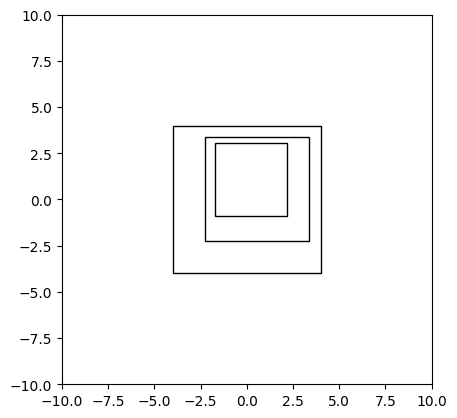

In [147]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random


def plot_nested_squares(ax, center, size, depth, reduction_factor):
    if depth == 0:
        return

    # Create a square
    square = patches.Rectangle(
        (center[0] - size / 2, center[1] - size / 2), size, size, fill=False
    )
    ax.add_patch(square)

    # Calculate the size of the next square
    new_size = size * reduction_factor

    # Generate random offsets within bounds to ensure no overlap
    max_offset = (size - new_size) / 2
    offset_x = random.uniform(-max_offset, max_offset)
    offset_y = random.uniform(-max_offset, max_offset)

    # Calculate the new center
    new_center = (center[0] + offset_x, center[1] + offset_y)

    plot_nested_squares(ax, new_center, new_size, depth - 1, reduction_factor)


# Set up the plot
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

# Parameters
center = (0, 0)
initial_size = 8
depth = 3
reduction_factor = 0.7

# Plot the nested squares
plot_nested_squares(ax, center, initial_size, depth, reduction_factor)

# Display the plot
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

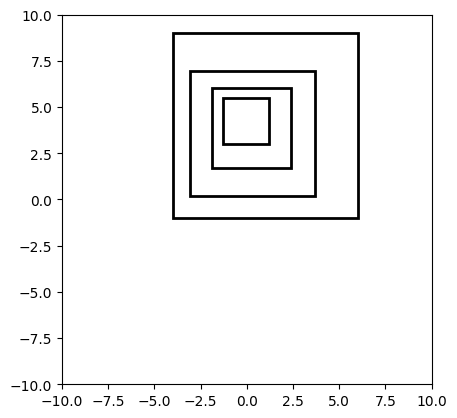

In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

def plot_nested_squares(ax, center, size, depth, reduction_factor, line_thickness, padding):
    if depth == 0:
        return

    # Create a square with specified line thickness
    square = patches.Rectangle(
        (center[0] - size / 2, center[1] - size / 2), size, size, fill=False, linewidth=line_thickness
    )
    ax.add_patch(square)

    # Calculate the size of the next square, reduced by the reduction factor and padding
    new_size = size * reduction_factor - padding

    # Ensure new_size is positive
    if new_size <= 0:
        return

    # Generate random offsets within bounds to ensure no overlap, adjusted for padding
    max_offset = (size - new_size - padding) / 2
    offset_x = random.uniform(-max_offset, max_offset)
    offset_y = random.uniform(-max_offset, max_offset)

    # Calculate the new center
    new_center = (center[0] + offset_x, center[1] + offset_y)

    plot_nested_squares(ax, new_center, new_size, depth - 1, reduction_factor, line_thickness, padding)

# Set up the plot
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

# Parameters
center = (1, 4)
initial_size = 10
depth = 4
reduction_factor = 0.75
line_thickness = 2  # Control the thickness of the square borders
padding = 0.75      # Add padding to avoid edges touching

# Plot the nested squares
plot_nested_squares(ax, center, initial_size, depth, reduction_factor, line_thickness, padding)

# Display the plot
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import os
import json

def plot_nested_squares(ax, center, size, depth, reduction_factor, line_thickness, padding):
    if depth == 0:
        return

    # Create a square with specified line thickness
    square = patches.Rectangle(
        (center[0] - size / 2, center[1] - size / 2), size, size, fill=False, linewidth=line_thickness
    )
    ax.add_patch(square)

    # Calculate the size of the next square, reduced by the reduction factor and padding
    new_size = size * reduction_factor - padding

    # Ensure new_size is positive
    if new_size <= 0:
        return

    # Generate random offsets within bounds to ensure no overlap, adjusted for padding
    max_offset = (size - new_size - padding) / 2
    offset_x = random.uniform(-max_offset, max_offset)
    offset_y = random.uniform(-max_offset, max_offset)

    # Calculate the new center
    new_center = (center[0] + offset_x, center[1] + offset_y)

    plot_nested_squares(ax, new_center, new_size, depth - 1, reduction_factor, line_thickness, padding)

def generate_and_save_images(num_images, depths, save_path):
    os.makedirs(save_path, exist_ok=True)
    image_details = []

    for i in range(num_images):
        fig, ax = plt.subplots()
        ax.set_aspect("equal")
        ax.set_xlim(-10, 10)
        ax.set_ylim(-10, 10)
        ax.axis('off')  # Remove axis ticks and lines

        # Randomly select a depth for this image
        depth = random.choice(depths)

        # Parameters
        center = (0, 0)
        initial_size = 8
        reduction_factor = 0.75
        line_thickness = 2
        padding = 0.75

        # Plot the nested squares
        plot_nested_squares(ax, center, initial_size, depth, reduction_factor, line_thickness, padding)

        # Save the figure
        image_name = f"nested_squares_{depth}_{i+1}.png"
        plt.savefig(os.path.join(save_path, image_name))
        plt.close(fig)

        # Store details in the image details list
        image_details.append({
            "image_name": image_name,
            "depth": depth,
            "reduction_factor": reduction_factor,
            "line_thickness": line_thickness,
            "padding": padding
        })

    # Save details to a JSON file
    with open(os.path.join(save_path, "image_details.json"), "w") as f:
        json.dump(image_details, f, indent=4)

# Example usage: generate 50 images with depths ranging from 2 to 5
generate_and_save_images(50, [2, 3, 4, 5], "saved_images")

In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import os
import json

def plot_nested_squares(ax, center, size, depth, reduction_factor, line_thickness, padding):
    if depth == 0:
        return

    # Create a square with specified line thickness
    square = patches.Rectangle(
        (center[0] - size / 2, center[1] - size / 2), size, size, fill=False, linewidth=line_thickness
    )
    ax.add_patch(square)

    # Calculate the size of the next square, reduced by the reduction factor and padding
    new_size = size * reduction_factor - padding

    # Ensure new_size is positive
    if new_size <= 0:
        return

    # Generate random offsets within bounds to ensure no overlap, adjusted for padding
    max_offset = (size - new_size - padding) / 2
    offset_x = random.uniform(-max_offset, max_offset)
    offset_y = random.uniform(-max_offset, max_offset)

    # Calculate the new center
    new_center = (center[0] + offset_x, center[1] + offset_y)

    plot_nested_squares(ax, new_center, new_size, depth - 1, reduction_factor, line_thickness, padding)

def generate_and_save_images(num_images, depths, save_path):
    os.makedirs(save_path, exist_ok=True)
    image_details = []

    for i in range(num_images):
        fig, ax = plt.subplots()
        ax.set_aspect("equal")
        ax.set_xlim(-10, 10)
        ax.set_ylim(-10, 10)
        ax.axis('off')  # Remove axis ticks and lines

        # Randomly select a depth and center for this image
        depth = random.choice(depths)
        center = (random.uniform(-5, 5), random.uniform(-5, 5))

        # Parameters
        initial_size = 8
        reduction_factor = 0.75
        line_thickness = 2
        padding = 0.75

        # Plot the nested squares
        plot_nested_squares(ax, center, initial_size, depth, reduction_factor, line_thickness, padding)

        # Save the figure
        image_name = f"nested_squares_{depth}_{i+1}.png"
        plt.savefig(os.path.join(save_path, image_name))
        plt.close(fig)

        # Store details in the image details list
        image_details.append({
            "image_name": image_name,
            "depth": depth,
            "center": center,
            "reduction_factor": reduction_factor,
            "line_thickness": line_thickness,
            "padding": padding
        })

    # Save details to a JSON file
    with open(os.path.join(save_path, "image_details.json"), "w") as f:
        json.dump(image_details, f, indent=4)

# Example usage: generate 50 images with depths ranging from 2 to 5
generate_and_save_images(50, [2, 3, 4, 5], "saved_images")

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import os
import json

def plot_nested_squares(ax, center, size, depth, reduction_factor, line_thickness, padding, squares_list):
    if depth == 0:
        return

    # Create a square with specified line thickness
    square = patches.Rectangle(
        (center[0] - size / 2, center[1] - size / 2), size, size, fill=False, linewidth=line_thickness
    )
    ax.add_patch(square)

    # Store the square's details
    squares_list.append({
        "center": center,
        "size": size
    })

    # Calculate the size of the next square, reduced by the reduction factor and padding
    new_size = size * reduction_factor - padding

    # Ensure new_size is positive
    if new_size <= 0:
        return

    # Generate random offsets within bounds to ensure no overlap, adjusted for padding
    max_offset = (size - new_size - padding) / 2
    offset_x = random.uniform(-max_offset, max_offset)
    offset_y = random.uniform(-max_offset, max_offset)

    # Calculate the new center
    new_center = (center[0] + offset_x, center[1] + offset_y)

    plot_nested_squares(ax, new_center, new_size, depth - 1, reduction_factor, line_thickness, padding, squares_list)

def generate_and_save_images(num_images, depths, save_path):
    os.makedirs(save_path, exist_ok=True)
    image_details = []

    for i in range(num_images):
        fig, ax = plt.subplots()
        ax.set_aspect("equal")
        ax.set_xlim(-10, 10)
        ax.set_ylim(-10, 10)
        ax.axis('off')  # Remove axis ticks and lines

        # Randomly select a depth and center for this image
        depth = random.choice(depths)
        center = (random.uniform(-5, 5), random.uniform(-5, 5))
        initial_size = random.uniform(8, 12)  # Random initial size between 8 and 12

        # Parameters
        reduction_factor = 0.75
        line_thickness = 2
        padding = 0.75
        squares_list = []

        # Plot the nested squares
        plot_nested_squares(ax, center, initial_size, depth, reduction_factor, line_thickness, padding, squares_list)

        # Save the figure
        image_name = f"nested_squares_{depth}_{i+1}.png"
        plt.savefig(os.path.join(save_path, image_name))
        plt.close(fig)

        # Store details in the image details list
        image_details.append({
            "image_name": image_name,
            "depth": depth,
            "center": center,
            "initial_size": initial_size,
            "reduction_factor": reduction_factor,
            "line_thickness": line_thickness,
            "padding": padding,
            "squares": squares_list
        })

    # Save details to a JSON file
    with open(os.path.join(save_path, "image_details.json"), "w") as f:
        json.dump(image_details, f, indent=4)

# Example usage: generate 50 images with depths ranging from 2 to 5
generate_and_save_images(50, [2, 3, 4, 5], "saved_images")

In [37]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import os
import json


def plot_nested_squares(
    ax, center, size, depth, reduction_factor, line_thickness, padding, squares_list
):
    if depth == 0:
        return

    # Create a square with specified line thickness
    square = patches.Rectangle(
        (center[0] - size / 2, center[1] - size / 2),
        size,
        size,
        fill=False,
        linewidth=line_thickness,
    )
    ax.add_patch(square)

    # Store the square's details
    squares_list.append({"center": center, "size": size})

    # Calculate the size of the next square, reduced by the reduction factor and padding
    new_size = size * reduction_factor - padding

    # Ensure new_size is positive
    if new_size <= 0:
        return

    # Generate random offsets within bounds to ensure no overlap, adjusted for padding
    max_offset = (size - new_size - padding) / 2
    offset_x = random.uniform(-max_offset, max_offset)
    offset_y = random.uniform(-max_offset, max_offset)

    # Calculate the new center
    new_center = (center[0] + offset_x, center[1] + offset_y)

    # Pass a copy of the list to the recursive call
    plot_nested_squares(
        ax,
        new_center,
        new_size,
        depth - 1,
        reduction_factor,
        line_thickness,
        padding,
        squares_list.copy(),
    )


def generate_and_save_images(num_images, depths, save_path):
    os.makedirs(save_path, exist_ok=True)
    image_details = []

    for i in range(num_images):
        fig, ax = plt.subplots()
        ax.set_aspect("equal")
        ax.set_xlim(-10, 10)
        ax.set_ylim(-10, 10)
        ax.axis("off")  # Remove axis ticks and lines

        # Randomly select a depth and center for this image
        depth = random.choice(depths)
        center = (random.uniform(-5, 5), random.uniform(-5, 5))
        initial_size = random.uniform(8, 12)  # Random initial size between 8 and 12

        # Parameters
        reduction_factor = 0.75
        line_thickness = 2
        padding = 0.75
        squares_list = []

        # Plot the nested squares
        plot_nested_squares(
            ax,
            center,
            initial_size,
            depth,
            reduction_factor,
            line_thickness,
            padding,
            squares_list,
        )

        # Save the figure
        image_name = f"nested_squares_{depth}_{i+1}.png"
        plt.savefig(os.path.join(save_path, image_name))
        plt.close(fig)

        # Store details in the image details list
        image_details.append(
            {
                "image_name": image_name,
                "depth": depth,
                "center": center,
                "initial_size": initial_size,
                "reduction_factor": reduction_factor,
                "line_thickness": line_thickness,
                "padding": padding,
                "squares": squares_list,
            }
        )

    # Save details to a JSON file
    with open(os.path.join(save_path, "image_details.json"), "w") as f:
        json.dump(image_details, f, indent=4)


# Example usage: generate 50 images with depths ranging from 2 to 5
generate_and_save_images(50, [2, 3, 4, 5], "saved_images")

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import os
import json


def compute_squares(center, size, depth, reduction_factor, padding, squares_list):
    if depth == 0:
        return

    # Store the current square's details
    squares_list.append({"center": center, "size": size})

    # Calculate the size of the next square, reduced by the reduction factor and padding
    new_size = size * reduction_factor - padding

    # Ensure new_size is positive
    if new_size <= 0:
        return

    # Generate random offsets within bounds to ensure no overlap, adjusted for padding
    max_offset = (size - new_size - padding) / 2
    offset_x = random.uniform(-max_offset, max_offset)
    offset_y = random.uniform(-max_offset, max_offset)

    # Calculate the new center
    new_center = (center[0] + offset_x, center[1] + offset_y)

    # Recursive call to compute further nested squares
    compute_squares(
        new_center, new_size, depth - 1, reduction_factor, padding, squares_list
    )


def plot_squares(ax, squares_list, line_thickness):
    for square in squares_list:
        center = square["center"]
        size = square["size"]
        # Create and add a square patch to the axes
        square_patch = patches.Rectangle(
            (center[0] - size / 2, center[1] - size / 2),
            size,
            size,
            fill=False,
            linewidth=line_thickness,
        )
        ax.add_patch(square_patch)


def generate_and_save_images(num_images, depths, save_path):
    os.makedirs(save_path, exist_ok=True)
    image_details = []

    for i in range(num_images):
        depth = random.choice(depths)
        center = (random.uniform(-5, 5), random.uniform(-5, 5))
        initial_size = random.uniform(8, 12)
        reduction_factor = 0.75
        padding = 0.75

        # Compute all squares first
        squares_list = []
        compute_squares(
            center, initial_size, depth, reduction_factor, padding, squares_list
        )

        # Plot and save images with different line thicknesses
        for line_thickness in [2, 3, 4]:
            fig, ax = plt.subplots(figsize=(10, 10))
            ax.set_aspect("equal")
            ax.set_xlim(-15, 15)
            ax.set_ylim(-15, 15)
            ax.axis("off")

            plot_squares(ax, squares_list, line_thickness)

            image_name = f"nested_squares_{depth}_{i+1}_thickness_{line_thickness}.png"
            plt.savefig(os.path.join(save_path, image_name))
            plt.close(fig)

            image_details.append(
                {
                    "image_name": image_name,
                    "depth": depth,
                    "center": center,
                    "initial_size": initial_size,
                    "reduction_factor": reduction_factor,
                    "line_thickness": line_thickness,
                    "padding": padding,
                    "squares": squares_list,
                }
            )

    # Save details to a JSON file
    with open(os.path.join(save_path, "image_details.json"), "w") as f:
        json.dump(image_details, f, indent=4)


# Example usage: generate 50 images with depths ranging from 2 to 5
generate_and_save_images(50, [2, 3, 4, 5], "saved_images")